* Extract mean and stdev of g2's where possible
* Saves only gaussian portions of g2 when overlapping and well-separated distributions are distinct
* Re-normalises each plot to total population

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import os

from __future__ import division
from scipy.special import erf
from scipy.stats import norm
from lmfit.models import GaussianModel

In [270]:
# diode separations (generated)
dsep90 = 9.240000123367228468e+01
dsep170 = 1.696000022644028604e+02
dsep240 = 2.388000031883220231e+02
dsep500 = 4.932000065849262569e+02
dsep950 = 9.504000126892011622e+02

In [271]:
def fit_gaussian(x, y, debug=False):
    mod = GaussianModel()
    pars = mod.guess(y, x=x)
    out = mod.fit(y, pars, x=x, 
    	# weights=(1 / (np.sqrt(y)))
    	)
    print(out.fit_report())
    if debug:
        plt.figure()
        out.plot_fit()
        plt.show()
    # return out.params['center'].value,out.params['center'].stderr
    return out.params['center'].value, out.params['sigma'].value

In [272]:
def boxplot_data(_center, _sigma):
    return np.array([norm.ppf(0.05,_center,_sigma), _center-_sigma, _center, _center+_sigma, norm.ppf(0.95,_center,_sigma)])

In [273]:
def saveresult(index,array,file):
    """writes a line in the format: index, *array"""
    with open(file,'a+') as f:
        if os.path.getsize(file)==0:
            f.write('#generated_separation(ns)\tpercentile5\tcenter-sigma\tcenter\tcenter+sigma\tpercentile95\n')
#         print('\t'.join([str(x) for x in [index,*array]])+'\n')
        f.write('\t'.join([str(x) for x in [index,*array]])+'\n')

# 90 ns separated
* perform renormalisation

In [274]:
g2_90 = np.loadtxt('g2_90ns.dat')

In [275]:
bins = g2_90[:,0]
freq = g2_90[:,1]

In [276]:
bins[1]-bins[0]

5.0

In [277]:
normalisation = np.sum(freq)

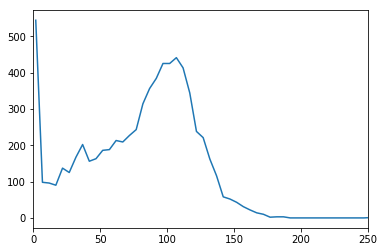

In [278]:
plt.figure()
plt.plot(bins,freq)
plt.xlim(0,250)
plt.show()

In [279]:
np.savetxt('g2_90ns_renormed.dat',
           np.array(list(zip(bins,freq/normalisation))),
           header='tau(ns)\tcounts',
           fmt='%f')

In [280]:
print (np.max(freq)/normalisation)

0.0759776536313


# 170 ns separated

In [281]:
g2_170 = np.loadtxt('g2_170ns.dat')

In [282]:
bins = g2_170[:,0]
freq = g2_170[:,1]

In [283]:
bins[1]-bins[0]

5.0

In [284]:
normalisation = np.sum(freq)

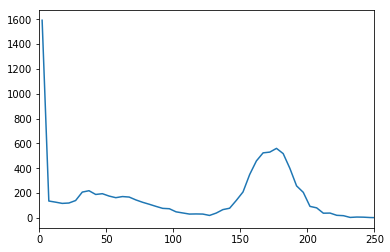

In [285]:
plt.figure()
plt.plot(bins,freq)
plt.xlim(0,250)
plt.show()

In [286]:
mask = (bins>120)&(bins<250)

[[Model]]
    Model(gaussian)
[[Variables]]
    center:      173.376937 +/- 0.318887 (0.18%) (init= 172)
    amplitude:   22857.2348 +/- 391.1948 (1.71%) (init= 25065)
    sigma:       16.1368098 +/- 0.318928 (1.98%) (init= 15)
    fwhm:        37.9992824 +/- 0.751018 (1.98%)  == '2.3548200*sigma'
    height:      565.088016 +/- 9.671157 (1.71%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          =  0.577 



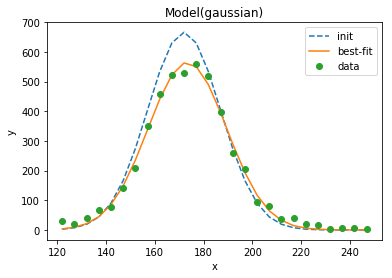

173.376937947847 16.13680980363818


In [287]:
center, sigma = fit_gaussian(bins[mask], freq[mask], debug=True)
print(center,sigma)

In [288]:
saveresult(dsep170, boxplot_data(center,sigma), 'gaussfit_result.dat')

In [289]:
print (center-3*sigma, center+3*sigma)

124.96650853693248 221.78736735876154


In [290]:
sigmamask = (bins>center-3*sigma)&(bins<center+3*sigma)

In [291]:
np.savetxt('g2_170ns_masked.dat',
           np.array(list(zip(bins[sigmamask],freq[sigmamask]/normalisation))),
           header='tau(ns)\tcounts',
           fmt='%f')

# 240 ns

In [292]:
g2_240 = np.loadtxt('g2_240ns.dat')

In [293]:
bins = g2_240[:,0]
freq = g2_240[:,1]

In [294]:
bins[1]-bins[0]

5.0

In [295]:
normalisation = np.sum(freq)

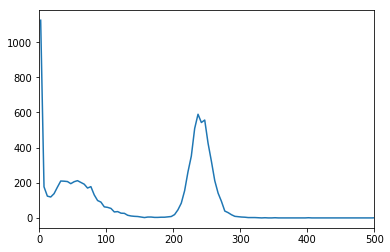

In [296]:
plt.figure()
plt.plot(bins,freq)
plt.xlim(0,500)
plt.show()

In [297]:
mask = (bins>200)&(bins<300)

[[Model]]
    Model(gaussian)
[[Variables]]
    center:      240.988820 +/- 0.288677 (0.12%) (init= 242)
    amplitude:   21859.1634 +/- 363.9117 (1.66%) (init= 26235)
    sigma:       15.0295689 +/- 0.289407 (1.93%) (init= 15)
    fwhm:        35.3919295 +/- 0.681502 (1.93%)  == '2.3548200*sigma'
    height:      580.225886 +/- 9.655206 (1.66%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          =  0.579 



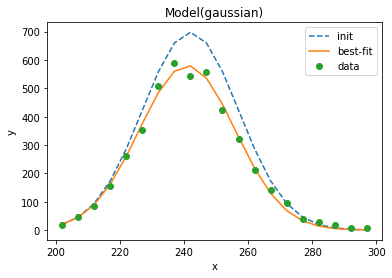

240.98882004385032 15.029568934548127


In [298]:
center, sigma = fit_gaussian(bins[mask], freq[mask], debug=True)
print(center,sigma)

In [299]:
saveresult(dsep240, boxplot_data(center,sigma), 'gaussfit_result.dat')

In [300]:
print (center-3*sigma, center+3*sigma)

195.90011324020594 286.0775268474947


In [301]:
sigmamask = (bins>center-3*sigma)&(bins<center+3*sigma)

In [302]:
np.savetxt('g2_240ns_masked.dat',
           np.array(list(zip(bins[sigmamask],freq[sigmamask]/normalisation))),
           header='tau(ns)\tcounts',
           fmt='%f')

# 500 ns

In [303]:
g2_500 = np.loadtxt('g2_500ns.dat')

In [304]:
bins = g2_500[:,0]
freq = g2_500[:,1]

In [305]:
bins[1]-bins[0]

5.0

In [306]:
normalisation = np.sum(freq)

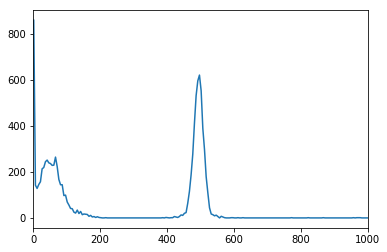

In [307]:
plt.figure()
plt.plot(bins,freq)
plt.xlim(0,1000)
plt.show()

In [308]:
mask = (bins>400)&(bins<600)

[[Model]]
    Model(gaussian)
[[Variables]]
    center:      494.522062 +/- 0.142224 (0.03%) (init= 494.5)
    amplitude:   22093.7083 +/- 188.4487 (0.85%) (init= 23250)
    sigma:       14.4405414 +/- 0.142224 (0.98%) (init= 12.5)
    fwhm:        34.0048756 +/- 0.334914 (0.98%)  == '2.3548200*sigma'
    height:      610.372877 +/- 5.206174 (0.85%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          =  0.577 



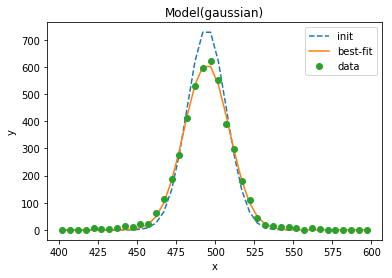

494.52206238592646 14.440541395005601


In [309]:
center, sigma = fit_gaussian(bins[mask], freq[mask], debug=True)
print(center,sigma)

In [310]:
saveresult(dsep500, boxplot_data(center,sigma), 'gaussfit_result.dat')

In [311]:
print (center-3*sigma, center+3*sigma)

451.2004382009097 537.8436865709433


In [312]:
sigmamask = (bins>center-3*sigma)&(bins<center+3*sigma)

In [313]:
np.savetxt('g2_500ns_masked.dat',
           np.array(list(zip(bins[sigmamask],freq[sigmamask]/normalisation))),
           header='tau(ns)\tcounts',
           fmt='%f')

# 950 ns

In [314]:
g2_950 = np.loadtxt('g2_950ns.dat')

In [315]:
bins = g2_950[:,0]
freq = g2_950[:,1]

In [316]:
bins[1]-bins[0]

5.0

In [317]:
normalisation = np.sum(freq)

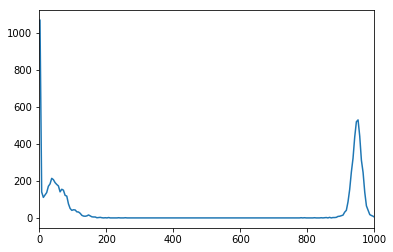

In [318]:
plt.figure()
plt.plot(bins,freq)
plt.xlim(0,1000)
plt.show()

In [319]:
mask = (bins>900)&(bins<1000)

[[Model]]
    Model(gaussian)
[[Variables]]
    center:      949.306011 +/- 0.254454 (0.03%) (init= 949.5)
    amplitude:   18102.2107 +/- 284.3317 (1.57%) (init= 19537.5)
    sigma:       14.0300381 +/- 0.254470 (1.81%) (init= 12.5)
    fwhm:        33.0382145 +/- 0.599231 (1.81%)  == '2.3548200*sigma'
    height:      514.733995 +/- 8.084846 (1.57%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          =  0.577 



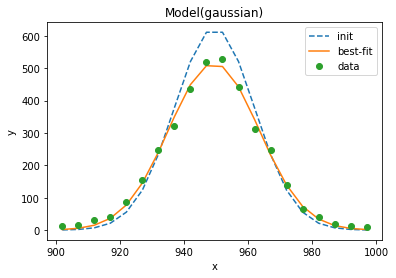

949.3060114901558 14.030038184602683


In [320]:
center, sigma = fit_gaussian(bins[mask], freq[mask], debug=True)
print(center,sigma)

In [321]:
saveresult(dsep950, boxplot_data(center,sigma), 'gaussfit_result.dat')

In [322]:
print (center-3*sigma, center+3*sigma)

907.2158969363478 991.3961260439638


In [323]:
sigmamask = (bins>center-3*sigma)&(bins<center+3*sigma)

In [324]:
np.savetxt('g2_950ns_masked.dat',
           np.array(list(zip(bins[sigmamask],freq[sigmamask]/normalisation))),
           header='tau(ns)\tcounts',
           fmt='%f')

In [325]:
center_errors = [
    949.3473118531595-dsep950,
    494.8998293288519-dsep500,
    242.08312243892317-dsep240,
    173.53794206502675-dsep170
]
print(np.mean(center_errors),np.std(center_errors))

1.96704523978 1.92397702667
